# **AP155 Lab Assignment**
## Module 4: Ordinary Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Taburno, Jasper Thon\
_Student No._:202008096\
_Section_: THU-HX-3

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Jasper Thon Jaducana Taburno

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/50
* Problem 2 - []/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**The Lotka-Volterra equations**

_Refer to Exercise 8.2 in the Newman text._ The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological species. Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators). You could think of $x$ and $y$ as being the population in thousands, say, so that $x = 2$ means there are 2000 rabbits.

In the Lotka-Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:

$$\frac{{\rm d}x}{{\rm d}t} = \alpha x - \beta xy,$$

where $\alpha$ and $\beta$ are constants. At the same time the foxes reproduce at a rate proportional to the rate at which they eat rabbits-- because they need food to grow and reproduce-- but also die of old age at a rate proportional to their own population:

$$\frac{{\rm d}y}{{\rm d}t}  = \gamma xy - \delta y,$$

where $\gamma$ and $\delta$ are also constants. *(25 pts.)*

1. Solve these equations using the fourth-order Runge-Kutta method for the case $\alpha = 1, \beta = \gamma = 0.5$, and $\delta = 2$, starting from the initial condition $x = y = 2$.

2. Make a graph showing both $x$ and $y$ as a function of time on the same axes from $t =0$ to $t = 30$. *(25 pts.)*

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin,pi

#Set the values of the constants
𝛼=1 
𝛽=0.5 
𝛾=0.5
𝛿=2 

def f(r,t):            #dr/dt
    x=r[0]             #let x be the 1st coordinate in r
    y=r[1]             #let y be the 2nd coordinate in r
    fx=𝛼*x-𝛽*x*y       #solve for first-order ODE dx/dt
    fy=𝛾*x*y-𝛿*y       #solve for first-order ODE dy/dt
    return np.array([fx,fy],float)

a,b=0.0,30.0    #t=0 to t=30
N=1000          #number of steps
h=(b-a)/N       #step width

t_pts=np.arange(a,b,h)  # construct time list from t=0 to t=30 in steps of h
x_pts=[]                # x values list
y_pts=[]                # y values list

r = np.array([2.0,2.0]) # initial condition x=y=2
for t in t_pts:
    xpoints.append(r[0]) #append current x to x_pts    
    ypoints.append(r[1]) #append current y to y_pts
    
    k1 = h*f(r,t)              #Equation 8.17a
    k2 = h*f(r+0.5*k1,t+0.5*h) #Equation 8.17b
    k3 = h*f(r+0.5*k2,t+0.5*h) #Equation 8.17c
    k4 = h*f(r+k3,t+h)         #Equation 8.17d
    r += (k1+2*k2+2*k3+k4)/6   #Add second term in Equation 8.17e to the current x and y values stored in r
    
    


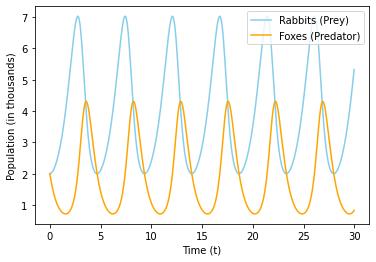

In [41]:
plt.plot(tpoints,xpoints,color='skyblue',label='Rabbits (Prey)')
plt.plot(tpoints,ypoints,color='orange',label='Foxes (Predator)')
plt.xlabel('Time (t)')
plt.ylabel('Population (in thousands)')
plt.legend()
plt.show()

From the graph we can vividly see the shifted sinusoidal relationship between predator and prey populations derived from the Lotka-Volterra Equations. If we take a look at the first 5 time units, we can observe that the fox population starts out with a decrease and in turn makes the rabbit population increase, which represents the logical environment where when there's less predators, the prey will have more leeway to reproduce. This trend continues until such a time that the population of prey is sufficient for the predator population to start increasing as well. However at this rate, the number of predators will eventually be too much for the rabbits to continue their population increase, causing a decrease that's negatively proportional to it's early growth, which in turn also brings about the decrease of the predator population due to the lack of prey. 

### PROBLEM 2

**Nonlinear pendulum**

_Refer to Exercise 8.4 in the Newman text._ Building on the results from Example 8.6, calculate the motion of a nonlinear pendulum as follows.

1. Solve the two first-order equations, Eqs. (8.45) and (8.46), using the fourth-order Runge-Kutta method for a pendulum with a 10 cm arm. Use your program to calculate the angle $\theta$ of displacement for several periods of the pendulum when it is released from a standstill at $\theta = 179^\circ$ from the vertical. *(25 pts.)*

2. Make a graph of $\theta$ as a function of time. *(25 pts.)*


In [45]:
g = 9.81 #acceleration due to gravity
l = 0.1 #10cm pendulum arm

def f(r,t):                   #dr/dt
    theta = r[0]              #let theta be the 1st coordinate in r
    omega = r[1]              #let omega be the 2nd coordinate in r
    d_theta = omega           #solve for first-order ODE d\theta/dt
    d_omega = -g/l*sin(theta) #solve for first-order ODE d\omega/dt
    return np.array([d_theta,d_omega],float)

a,b=0.0,10.0   #t=0 to t=10
N=1000         #number of steps
h=(b-a)/N      #step size

t_pts=np.arange(a,b,h) #construct time list from t=0 to t=10 in steps of h
theta_pts=[]           #generate an empty list to store the theta values

r = np.array([179/180*pi,0],float) #initial condition theta = 179 degrees and omega=0

for t in t_pts:
    theta_pts.append(r[0])       #append current theta to theta points    
    k1 = h * f(r,t)              #Equation 8.17a
    k2 = h * f(r+0.5*k1,t+0.5*h) #Equation 8.17b
    k3 = h * f(r+0.5*k2,t+0.5*h) #Equation 8.17c
    k4 = h * f(r+k3,t+h)         #Equation 8.17d
    r += (k1+2*k2+2*k3+k4)/6     #add second term in Eq. 8.17e to the current x and y values stored in r

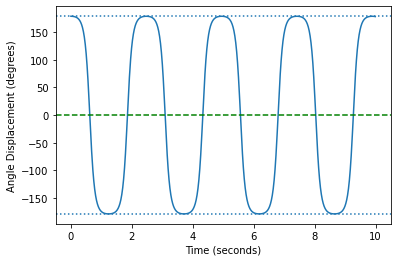

In [46]:
max,min = 0,0 #initialize min and max

for x in range(len(theta_pts)): #calculate min and max using for loop
    
    theta_pts[x] = theta_pts[x]*180/pi
    
    if theta_pts[x] > max:
        max = theta_pts[x]
    
    if theta_pts[x] < min:
        min = theta_pts[x]
        
plt.plot(t_pts,theta_pts) #plot of tpoints vs. thetapoints 

#Dashed lines for minima, maxima, 0
plt.axhline(y=max,linestyle=':')
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=min,linestyle=':')

plt.xlabel('Time (seconds)')
plt.ylabel('Angle Displacement (degrees)') 
plt.show()

The Runge-Kutta method of the fourth order was used to calculate the angle $\theta$ of displacement for several periods of a pendulum with an arm length of 10 centimeters. Similar to the previous graph, we can also observe a sinusoidal behavior with a frequency of 0.4 Hz (4 cycles per 10 seconds).